In [1]:
import pandas as pd
import numpy as np
import h5py
from sklearn.model_selection import train_test_split

### IEE-CIS fraud detection data set (from kaggle challenge 2019)

In [4]:
x_train = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/train_transaction.csv')
x_train2 = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/train_identity.csv')

In [5]:
print(x_train.shape, x_train2.shape)
print(x_train.columns) #, x_train2.columns)

for i, name in enumerate(x_train.columns):
    print(name)
    # print(x_train[name].dtypes)

# Filter columns that are of type 'float'
float_cols = x_train.select_dtypes(include='float').columns
# print("Columns with float values:", float_cols)
# for i, name in enumerate(float_cols.columns):
#     print(name)

# Filter columns that are NOT of type 'float'
non_num_cols = x_train.select_dtypes(exclude=['float', 'int']).columns
print("Columns without numeric values:", non_num_cols, len(non_num_cols))
for i, name in enumerate(non_num_cols):
    print(name, x_train[name].dtypes)

(590540, 394) (144233, 41)
Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)
TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V1

In [6]:
x_train = x_train.sort_values(by='TransactionDT')
x_train = x_train.drop(columns=non_num_cols)
y_train = x_train['isFraud']
x_train = x_train.drop(columns='isFraud')
print(x_train.shape, y_train.shape)

(590540, 379) (590540,)


In [7]:
x_train = x_train.fillna(0)
has_nan = y_train.isnull().any()
print(has_nan)
print(x_train.isnull().any())

False
TransactionID     False
TransactionDT     False
TransactionAmt    False
card1             False
card2             False
                  ...  
V335              False
V336              False
V337              False
V338              False
V339              False
Length: 379, dtype: bool


In [8]:
X = np.array(x_train)
y = np.array(y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=False)  # don't shuffle otherwise destroys time series
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(413378, 379) (413378,) (177162, 379) (177162,)


In [9]:
from preprocess import normalize3
print(max(X_train[0]))
X_train, min_a, max_a = normalize3(X_train, min_a=None)
print(max(X_train[0]))
X_test, _, _ = normalize3(X_test, min_a, max_a)

2987000.0
0.9999000099990001


In [10]:
print(X_train.shape)
print(X_test.shape)

(413378, 379)
(177162, 379)


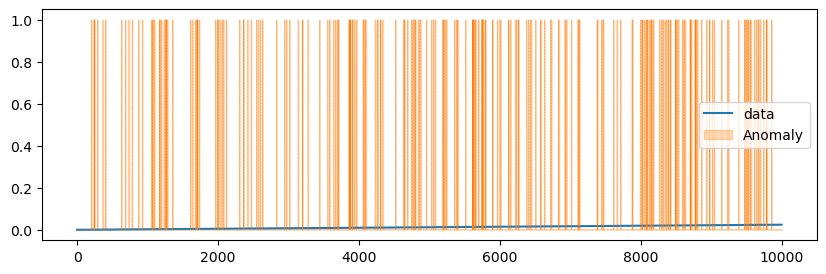

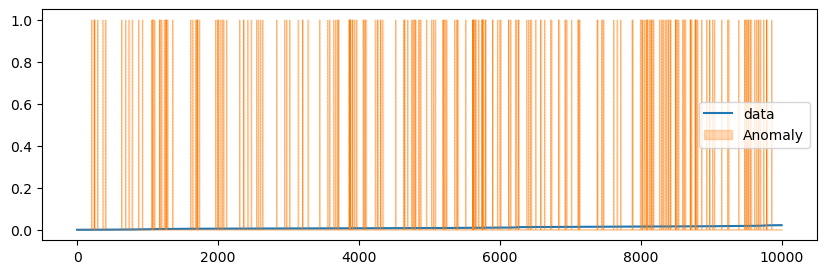

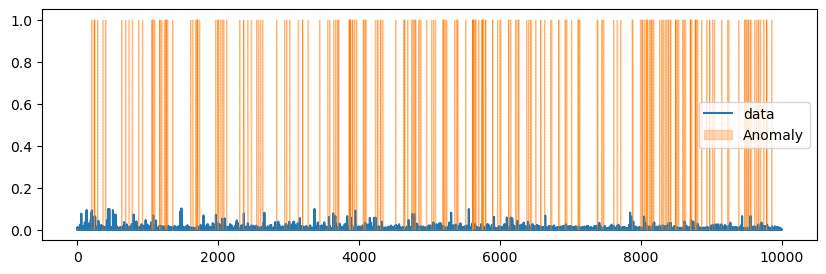

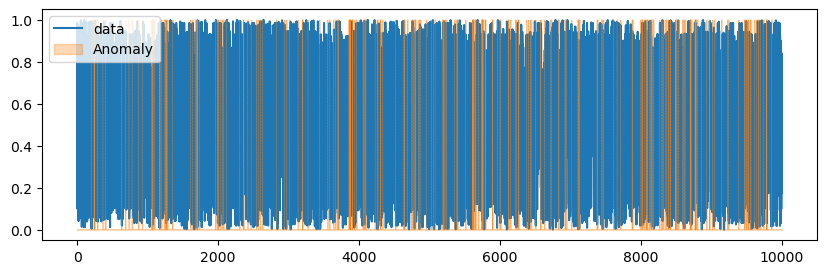

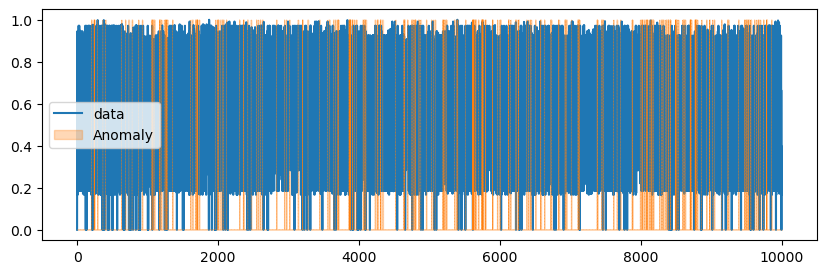

In [11]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

for dim in range(5):
    x_t, l = X_train[:10000, dim], y_train[:10000]
    plt.figure(figsize=(10, 3))
    plt.plot(x_t, label='data')
    plt.plot(l, '--', linewidth=0.2)
    plt.fill_between(np.arange(l.shape[0]), l, color='tab:orange', alpha=0.3, label='Anomaly')
    plt.legend()
    plt.show()
    plt.close()



In [12]:
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]
print(y_train.shape, y_test.shape)

(413378, 1) (177162, 1)


In [13]:
print(len(y[y==1])/ len(y))

0.03499000914417313


In [14]:
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/IEEECIS/train_1.npy', X_train)
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/IEEECIS/test_1.npy', X_test)
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/IEEECIS/labels_1.npy', y_test)

In [ ]:
# x_train['day'] = x_train['TransactionDT'] / (24 * 60 * 60)  # to convert seconds to hours

In [ ]:
# x_train['uid1'] =  (x_train.day - x_train.D1).astype(str) +'_' + \
#             x_train.P_emaildomain.astype(str)
# x_train['uid2'] =  (x_train.card1.astype(str) +'_' + \
#             x_train.addr1.astype(str) +'_' + \
#             (x_train.day - x_train.D1).astype(str) +'_' + \
#             x_train.P_emaildomain.astype(str))

In [ ]:
# print(x_train['uid1'])
# print(x_train['uid1'].unique)
# print(x_train['uid2'])
# print(x_train['uid2'].unique)

In [ ]:
x_train

In [ ]:
x_test = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/test_transaction.csv')
x_test2 = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/test_identity.csv')


In [ ]:
print(x_test.columns)
print(x_test.shape)

for i, name in enumerate(x_test.columns):
    print(name)

In [ ]:
x_train = pd.sort_values(by='')